In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install findspark

In [0]:
!pip install pyspark

In [0]:
import findspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
# findspark.init()
from pyspark.sql import SparkSession
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()
# spark = SparkSession.builder.appName("app_name").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

## Remove space in columns and rows

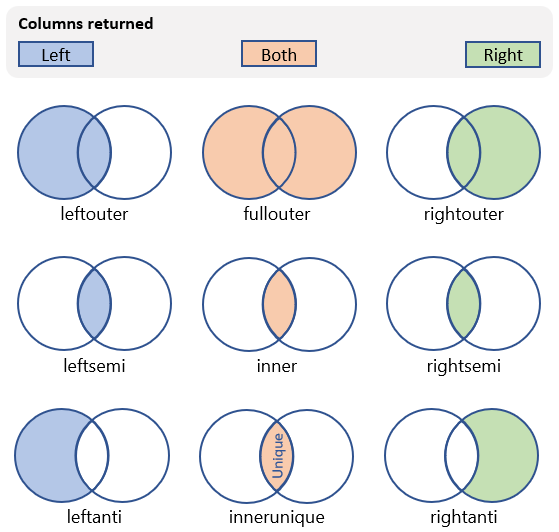

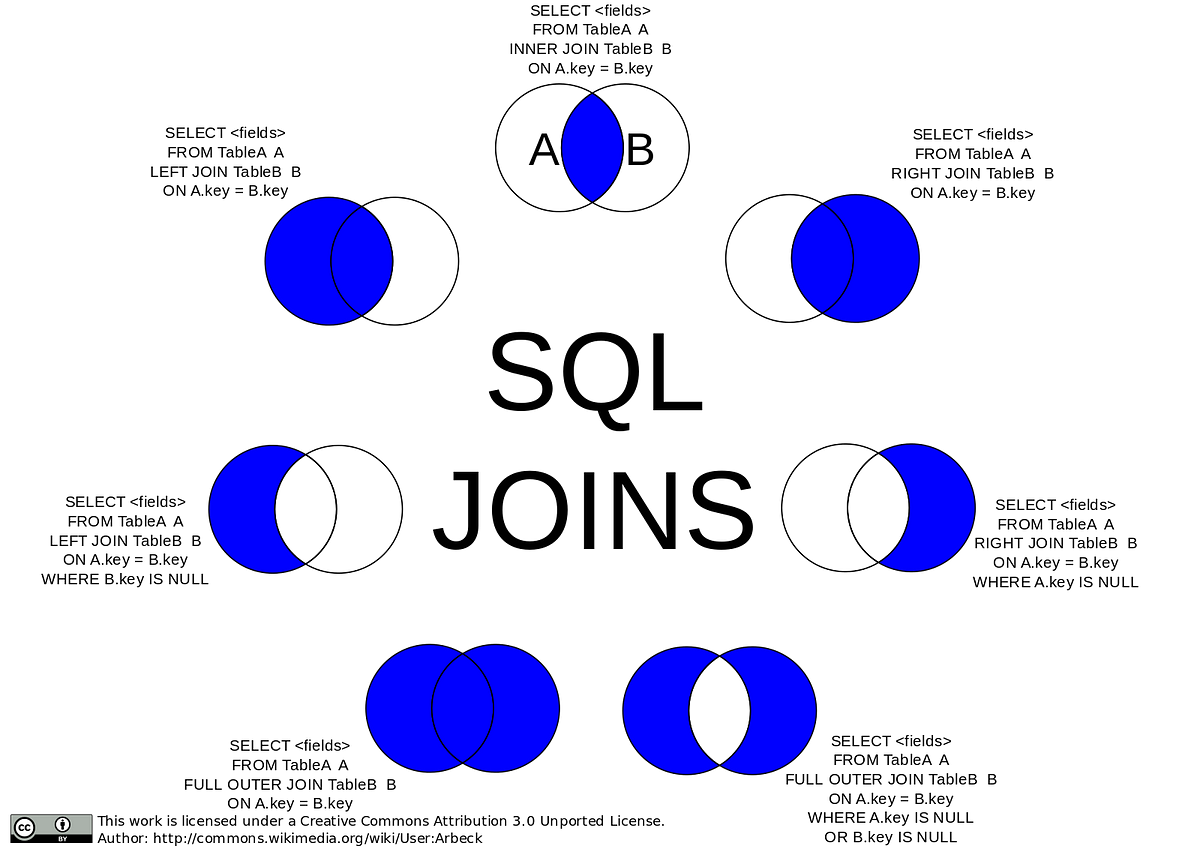

## Inner Join



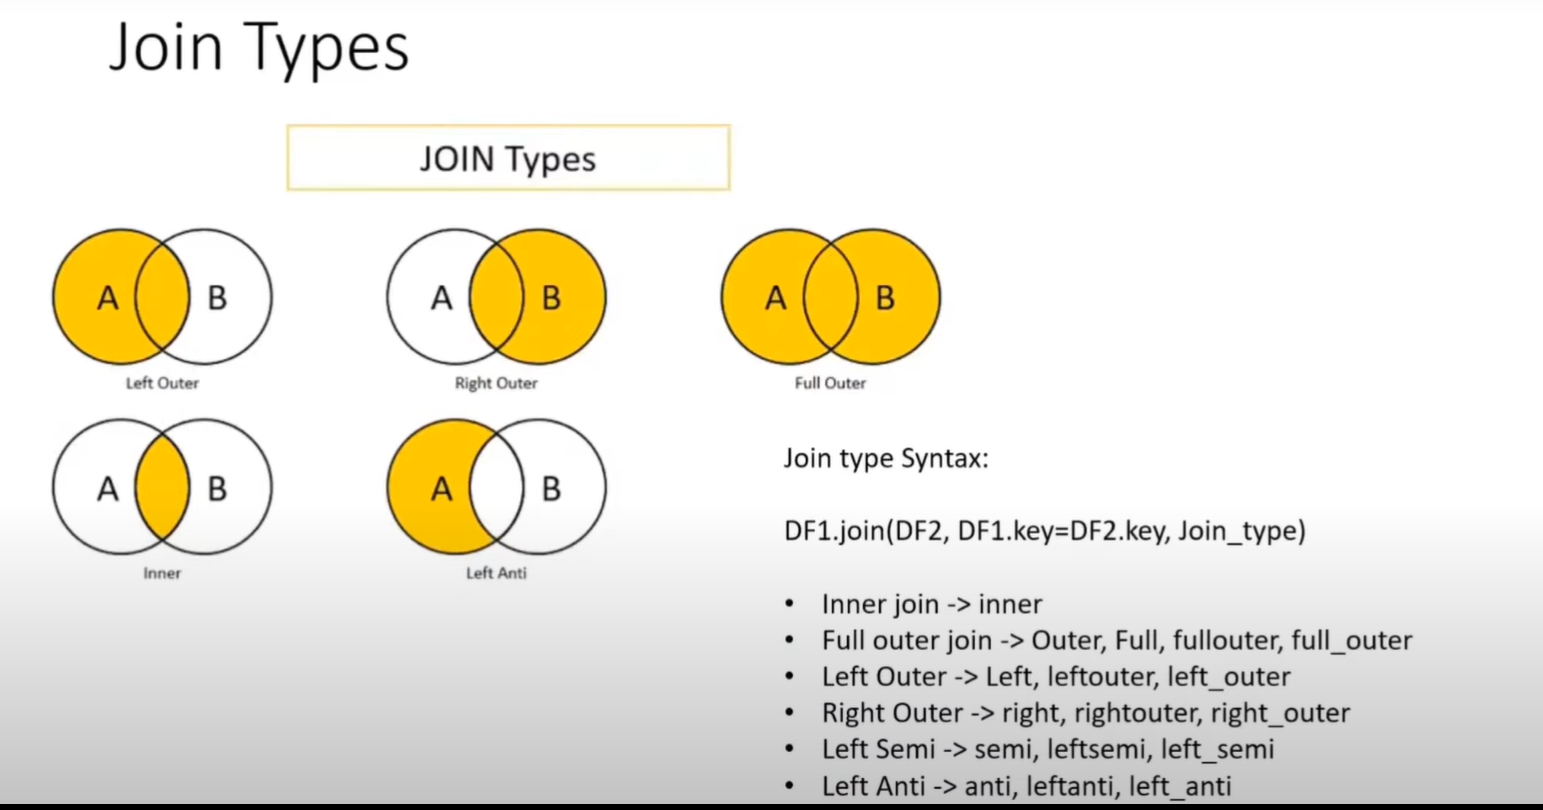


# Syntax
[PySpark Join](https://sparkbyexamples.com/pyspark/pyspark-join-explained-with-examples/)

join(right, joinExprs, joinType)
join(right)

In [0]:
employee = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]

empl_schema = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

# empl_schema = StructType([
#     StructField('emp_id', IntegerType(), True),
#     StructField('name', StringType(), True),
#     StructField('superior_emp_id', IntegerType(), True),
#     StructField('year_joined', IntegerType(), True),
#     StructField('emp_dept_id', IntegerType(), True),
#     StructField('gender', StringType(), True),
#     StructField('salary', IntegerType(), True)
# ])

df_employee = spark.createDataFrame(employee, schema = empl_schema)
# df_employee.printSchema()
df_employee.show(truncate=True)
df_employee.select('emp_id').show()

In [0]:
dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
df_department = spark.createDataFrame(data=dept, schema = deptColumns)
df_department.printSchema()
df_department.show(truncate=False)

## Inner Join: Returns only the rows with matching keys in both DataFrames.


## Left Join: Returns all rows from the left DataFrame and matching rows from the right DataFrame.

## Right Join: Returns all rows from the right DataFrame and matching rows from the left DataFrame.


## Full Outer Join: Returns all rows from both DataFrames, including matching and non-matching rows.


## Left Semi Join: Returns all rows from the left DataFrame where there is a match in the right DataFrame.


## Left Anti Join: Returns all rows from the left DataFrame where there is no match in the right DataFrame.

## Inner Join

In [0]:
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'inner').show()

## PySpark Full Outer Join

In [0]:
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'outer').show(truncate=False)

df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'outer').count() == \
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'full').count() == \
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'fullouter').count() == \
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'full_outer').count()


df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'full_outer').count()






## Left Semi Join

In [0]:
df_employee.join(df_department, df_department['dept_id'] == df_employee['emp_dept_id'], 'left_semi').show()
df_department.show()

In [0]:
# Get employee IDs not present in the department table
employee_only_ids = df_employee.select('emp_dept_id').subtract(df_department.select('dept_id'))
employee_only_ids.show()

# Join the employee table with the employee-only IDs
df_employee_not_department = df_employee.join(employee_only_ids, on='emp_dept_id').show()

## PySpark SQL Join on multiple DataFrames

In [0]:
# Join on multiple dataFrames
df1.join(df2,df1.id1 == df2.id2,"inner").join(df3,df1.id1 == df3.id3,"inner")

## Using SQL Expression

In [0]:
df_employee.createOrReplaceTempView("EMPLOYEE_TABLE")
df_department.createOrReplaceTempView("DEPARTMENT_TABLE")

joinDf = spark.sql(""" SELECT e.* FROM EMPLOYEE_TABLE e JOIN DEPARTMENT_TABLE d
ON e.emp_dept_id == d.dept_id
""").show()


## PySpark Join Two or Multiple DataFrames

In [0]:
# employee table
empData = [(1,"Smith",10), (2,"Rose",20),
    (3,"Williams",10), (4,"Jones",30)]
empColumns = ["emp_id","name","emp_dept_id"]
empDF = spark.createDataFrame(empData,empColumns)
empDF.show()

# department table
deptData = [("Finance",10), ("Marketing",20),
    ("Sales",30),("IT",40)
  ]
deptColumns = ["dept_name","dept_id"]
deptDF=spark.createDataFrame(deptData,deptColumns)
deptDF.show()

# Address Table
addData=[(1,"1523 Main St","SFO","CA"),
    (2,"3453 Orange St","SFO","NY"),
    (3,"34 Warner St","Jersey","NJ"),
    (4,"221 Cavalier St","Newark","DE"),
    (5,"789 Walnut St","Sandiago","CA")
  ]
addColumns = ["emp_id","addline1","city","state"]
addDF = spark.createDataFrame(addData,addColumns)
addDF.show()

In [0]:
# PySpark Join Two DataFrames
empDF.join(addDF, empDF['emp_id'] == addDF['emp_id'], 'inner').show()

# Removes duplicates columns
empDF.join(addDF, ['emp_id']).show()

empDF.join(addDF, empDF['emp_id'] == addDF['emp_id']).count()

In [0]:
#Join Multiple DataFrames by chaining
empDF.join(addDF, ['emp_id']).join(deptDF, deptDF['dept_id'] == empDF['emp_dept_id']).show()

## Join Condition Using Where or Filter

In [0]:
empDF.join(addDF, ['emp_id']).join(deptDF).where(deptDF['dept_id'] == empDF['emp_dept_id']).show()


